# Lista de Exercícios 2

01) Lista de Exercícios da CPE723 Edição Presencial - Exercício 1. No item 1(b), onde está escrito "três números aleatórios equiprováveis", leia-se "três números aleatórios, sorteados de PDF uniforme entre 0 e 1". 

02) Lista de Exercícios da CPE723 Edição Presencial - Exercício 2.

03) Lista de Exercícios da CPE723 Edição Presencial - Exercício 3.

04) Prova de 2009 - Questão 2, itens (a) e (c) (resolvida em aula no dia 12/04/2022).

05) Prova de 2011 - Questão 2, itens (a), (b), e (e).

06) (Opcional/Desafio) Prova de 2012 - Questão 3.

07) Prova de 2016 - Questão 2.

08) Prova de 2016 - Questão 3.

09) Prova de 2017 - Questão 3, itens (b) e (c).

10) Prova de 2018 - Questão 3.

# 01) Lista de Exercícios da CPE723 Edição Presencial - Exercício 1. No item 1(b), onde está escrito "três números aleatórios equiprováveis", leia-se "três números aleatórios, sorteados de PDF uniforme entre 0 e 1".

## a)

Nesse caso, $X(n)$ será dado por:

$$p(X(n)) = p_0M^n$$

In [20]:
import numpy as np

M = np.array([[0.5, 0.25, 0.25],[0.25, 0.5, 0.25],[0.25, 0.25, 0.5]])
p0 = np.array([0.3, 0.4, 0.3]).reshape(1, 3)

pX3 = np.matmul(p0, np.linalg.matrix_power(M, 3))

print("Distribuição p3: ", pX3)

Distribuição p3:  [[0.3328125 0.334375  0.3328125]]


## b)



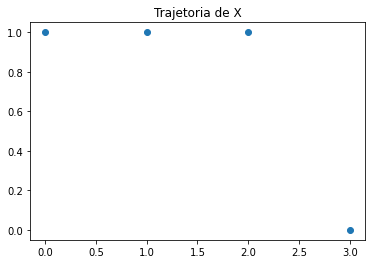

In [36]:
import matplotlib.pyplot as plt 

X = [1]
rs = []

for i in range(0, 3):
    r = np.random.uniform(0, 1)
    rs.append(r)
    for j in range(0, 3):
        if r <= M[j, X[i]]:
            X.append(j)
            break
        else:
            r -= M[j, X[i]]
 
plt.scatter(range(0, 4), X)
plt.title("Trajetoria de X")
plt.show()

## c)

In [95]:
import matplotlib.pyplot as plt 
import random

Xs = []

for k in range(0, 100):
    X = [random.randint(0, 2)]

    for i in range(0, 3):
        r = np.random.uniform(0, 1)
        for j in range(0, 3):
            if r <= M[j, X[i]]:
                X.append(j)
                break
            else:
                r -= M[j, X[i]]
    
    Xs.append(X)
    
Xs = np.array(Xs)

## d)

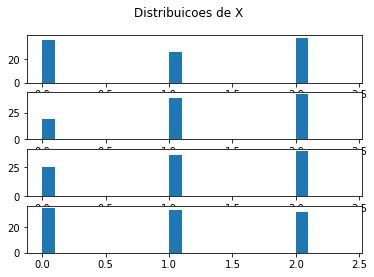

In [96]:
ps = []

for i in range(0, 4):
    cs = []
    for j in range(0, 3):
        cs.append(np.sum(Xs[:, i] == j)/100)

    ps.append(cs)

ps = np.array(ps)

fig, axs = plt.subplots(4)
fig.suptitle('Distribuicoes de X')
for i in range(0,4):
    axs[i].hist(Xs[:, i], bins=np.arange(0, 2.5, 0.1))

plt.show()

# 02) Lista de Exercícios da CPE723 Edição Presencial - Exercício 2.


## a)
Adotando um algorítmo de Metropolis que sorteia um estado para transição dentre todos os possíveis,  com changes iguais (1/5), temos:

In [97]:
Jx = [0.5, 0.2, 0.3, 0.1, 0.4]

In [135]:
import numpy as np

M = []
T = 0.1

for i in range(0, 5):
    m = []
    for j in range(0, 5):
        if i == j:
            m.append(0)
        else:
            if (Jx[i] - Jx[j]) < 0:
                m.append(1/5)
            else:
                m.append(np.exp(-(Jx[i] - Jx[j])/T)*1/5)

    M.append(m)
    
M = np.array(M)

for i in range(0,5):
    M[i, i] = 1- np.sum(M[np.arange(0, 5) != i, i])
    
print("Matriz de transição M: ")
print(M)

Matriz de transição M: 
[[0.2        0.00995741 0.02706706 0.00366313 0.07357589]
 [0.2        0.68939964 0.2        0.07357589 0.2       ]
 [0.2        0.07357589 0.49935706 0.02706706 0.2       ]
 [0.2        0.2        0.2        0.88573651 0.2       ]
 [0.2        0.02706706 0.07357589 0.00995741 0.32642411]]


## b) 

In [158]:
import math

# Metropolis
X = [random.randint(0, 4)]
T = 0.1

for n in range(1, 4):
    
    xhat = random.randint(0, 4)
        
    dJ = Jx[xhat] - Jx[X[n-1]]
    q = math.exp(-dJ/(T))
    r = random.uniform(0, 1)
    
    if r < q:
        X.append(xhat)
    else:
        X.append(X[n-1])

X = np.array(X)

print("Sequência de estados: ")
print(X+1)

Sequência de estados: 
[3 3 4 4]


## c)

## d)

In [163]:
T = 0.1

for i in range(0,5):
    print("Fator x =", i+1,":", np.exp(-Jx[i]/T))

Fator x = 1 : 0.006737946999085467
Fator x = 2 : 0.1353352832366127
Fator x = 3 : 0.049787068367863965
Fator x = 4 : 0.36787944117144233
Fator x = 5 : 0.01831563888873418


## e)

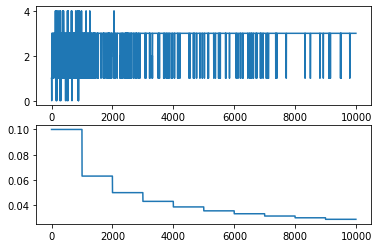

In [168]:
import math

# Metropolis
X = []
x = random.randint(0, 4)
xhat = 0
Ts = [0.1, 0.0631, 0.05, 0.0431, 0.0387, 0.0356, 0.0333, 0.0315, 0.0301, 0.0289]
Tlista = []
Xs = np.zeros((5, len(Ts)))
N = 1000

for k in range(0, len(Ts)):
    T = Ts[k]
    for n in range(1, N):

        xhat = random.randint(0, 4)

        dJ = Jx[xhat] - Jx[x]
        q = math.exp(-dJ/(T))
        r = random.uniform(0, 1)

        if r < q:
            x = xhat

        X.append(x)
        Tlista.append(T)
        Xs[x, k] += 1
        

X = np.array(X)

fig, axs = plt.subplots(2)
axs[0].plot(X)
axs[1].plot(Tlista)
plt.show()

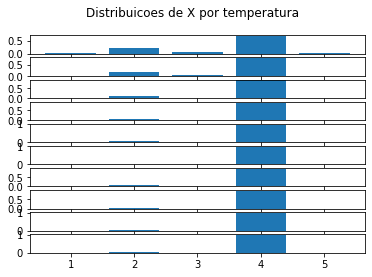

In [171]:
fig, axs = plt.subplots(len(Ts))
fig.suptitle('Distribuicoes de X por temperatura')
for i in range(0,len(Ts)):
    axs[i].bar(range(1, 6), Xs[:, i]/np.sum(Xs[:, i]))

plt.show()

Como esperado, conforme a temperatura diminui, maior é a tendência do estado permanecer como sendo o de menor energia (x = 4).